In [ ]:
#Step 5B: Reinforcement learning with Proximal Policy Optimization (PPO)

In [17]:
# ppo_trainer.py
!pip install shimmy>=2.0
!pip install gymnasium
import gymnasium as gym
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from rl_trading_agent import TradingEnv

# Load Data
raw_df = pd.read_csv("xxxxxxxxx")

# Create a Gym environment (encapsulated as a vectorized environment)
def make_env():
    return TradingEnv(raw_df)

env = DummyVecEnv([make_env])

# Initializing the PPO model
model = PPO(
    policy="MlpPolicy",
    env=env,
    verbose=1,
    tensorboard_log="./ppo_logs/",
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
)

model.learn(total_timesteps=50_000)
model.save("ppo_trading_agent")
print("✅ PPO Agent 已保存为 ppo_trading_agent.zip")




Using cpu device
Logging to ./ppo_logs/PPO_11


C:\Users\24716\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 735  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 458          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0043735043 |
|    clip_fraction        | 0.0372       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.0782      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0209      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00427     |
|    std                  | 0.992        |
|    value_loss           | 0.0176       |
----------------

In [18]:
#Record signal and Asset Info
obs = env.reset()
done = False
log = []

while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    log.append({
        "step": env.envs[0].step_idx,
        "position": env.envs[0].position,
        "reward": reward[0],
        "asset_value": info[0]["asset_value"],
        "signal": float(action[0])
    })

    if done[0]:
        break
# 保存为 CSV
log_df = pd.DataFrame(log)
log_df.to_csv("ppo_trading_log.csv", index=False)
print("The strategy signals and asset records are saved as ppo_trading_log.csv")

C:\Users\24716\AppData\Local\Temp\ipykernel_20376\3414249038.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "signal": float(action[0])


✅ 策略信号与资产记录保存为 ppo_trading_log.csv


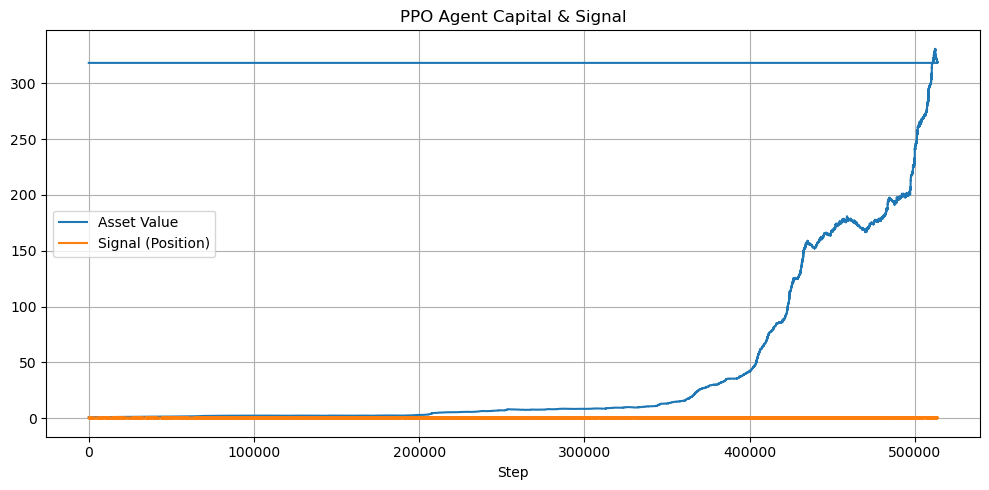

In [19]:
# Model Result Visualization
import pandas as pd
import matplotlib.pyplot as plt

log_df = pd.read_csv("ppo_trading_log.csv")

plt.figure(figsize=(10, 5))
plt.plot(log_df["step"], log_df["asset_value"], label="Asset Value")
plt.plot(log_df["step"], log_df["signal"], label="Signal (Position)")
plt.title("PPO Agent Capital & Signal")
plt.xlabel("Step")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()